# Optimizing App Offers With Starbucks
### Notebook 1: Exploration

## Data Assessment

In [1]:
import pandas as pd
import json
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Custom colors that we will use in graphs:
custom_colors = ['#006241', '#84233C', '#1E3932', '#9D5116', '#E44C2C']

In [3]:
# read in the json files
offers = pd.read_json('data/portfolio.json', orient='records', lines=True)
users = pd.read_json('data/profile.json', orient='records', lines=True)
events = pd.read_json('data/transcript.json', orient='records', lines=True)

**portfolio.json**
Offers sent during 30-day test period (10 offers x 6 fields)

- reward: (numeric) money awarded for the amount spent
- channels: (list) web, email, mobile, social
- difficulty: (numeric) money required to be spent to receive reward
- duration: (numeric) time for offer to be open, in days
- offer_type: (string) bogo, discount, informational
- id: (string/hash)

In [4]:
offers

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


**profile.json**
Rewards program users (17000 users x 5 fields)

- gender: (categorical) M, F, O, or null
- age: (numeric) missing value encoded as 118
- id: (string/hash)
- became_member_on: (date) format YYYYMMDD
- income: (numeric)

In [5]:
users.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [7]:
users.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**transcript.json**
Event log (306648 events x 4 fields)

- person: (string/hash)
- event: (string) offer received, offer viewed, transaction, offer completed
- value: (dictionary) different values depending on event type
 - offer id: (string/hash) not associated with any "transaction"
 - amount: (numeric) money spent in "transaction"
 - reward: (numeric) money gained from "offer completed"
- time: (numeric) hours after start of test

In [8]:
events.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [9]:
print("\nCheck for missing values:\n")

for file in [offers, users, events]:

    print(file.shape)
    print(file.isnull().sum())
    print("\n")


Check for missing values:

(10, 6)
reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


(17000, 5)
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64


(306534, 4)
person    0
event     0
value     0
time      0
dtype: int64




In [10]:
print("\nCheck for duplicate ids:\n")

for file in [offers, users]:

    print(file.shape)
    print(len(file[file.id.duplicated()]))
    print("\n")


Check for duplicate ids:

(10, 6)
0


(17000, 5)
0




## Data Cleaning

**Dataset challenges:**

- The "transaction" event does not have any "offer_id" associated to it, so we have to figure out which transactions are connected to particular offer and which ones are not (customer bought something casually).
- Informational offer can not be "completed" due to it's nature, so we need to find a way to connect it with the possible transactions. 
- Some demographic groups will make purchases regardless of whether they receive an offer. Ideally we would like to group them separately.
- A user can complete the offer without actually seeing it. In this case user was making a regular purchase and offer completed automatically. This is not a result of particular marketing campaign but rather a coincidence.

**Data quality issues:**
- Null values for "gender" and "income" in profile.json
- Age: missing value encoded as 118 in profile.json
- Incorrect data format (int64 instead of datetime) in profile.json
- Column names can be improved
- Incompatible units - offer duration days vs. event time in hours
- Different keys in transcript.json - "event id" and "event_id"

**Data tidiness issues:**
- List values in "channels"
- Dictionary values in "value"
- Some rows can be merged together in transcript.json 


|                                       | portfolio.json  | profile.json| transcript.json                     | 
| ------------------------------------- |:---------------:| :----------:|:-----------------------------------:|
| Each variable forms a column          |⚠️ "channels"   |☑️           |⚠️ "value"                           |
| Each observation forms a row          |☑️              |☑️           |⚠️                                   |  
| Each observational unit forms a table |☑️              |☑️           |☑️                                   |  

#### Add more convenient ids for 10 types of offer: "short_offer_id"

In [11]:
offers['short_offer_id'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

#### Convert offer duration from days to hours: "duration_hrs"

In [12]:
offers['duration_hrs'] = offers.duration*24
offers

,reward,channels,difficulty,duration,offer_type,id,short_offer_id,duration_hrs
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,A,168
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B,120
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed,C,96
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,D,168
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,E,240
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,F,168
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,G,240
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,H,72
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,I,120
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5,J,168


#### Fix incorrect data format in datetime column "became_member_on"

In [13]:
users['became_member_on'] = pd.to_datetime(users['became_member_on'], format='%Y%m%d')
users.head(3)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN


#### Create new column "days_of_membership"

To calculate the term of membership, we need to know what is the date when the data was collected. There was no such info provided in the Udacity project description, so we have to assume some date here. Let's take the date when the introductory project video was uploaded to YouTube - **October 18, 2018**. Another clue for 2018 being the correct year is the fact that 2018 - 118 (our "missing" age) is **1900**, which is probably the default birth year that was shown to users.

In [14]:
import datetime

assumed_data_collection_date = "2018-10-18"

users['days_of_membership'] = datetime.datetime.strptime(assumed_data_collection_date, '%Y-%m-%d') - users['became_member_on']
users['days_of_membership'] = users['days_of_membership'].dt.days.astype('int16')
users.days_of_membership.describe()

count    17000.000000
mean       601.449882
std        411.223904
min         84.000000
25%        292.000000
50%        442.000000
75%        875.000000
max       1907.000000
Name: days_of_membership, dtype: float64

#### Decide what to do with missing values in individual tables

In [15]:
users.gender.value_counts() # checking the labels that we have

M    8484
F    6129
O     212
Name: gender, dtype: int64

We will plot our data later in the appropriate section, but before that we want to see two histograms below to decide what to do with the missing data, for example do we want to fill it in with some average value.

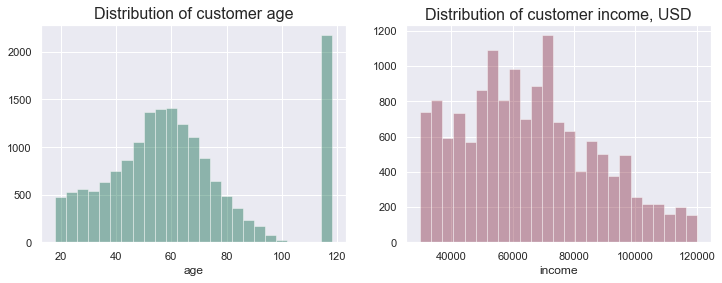

In [16]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))

sns.distplot(users['age'], bins=25, kde=False, ax=ax[0], color=custom_colors[0])
sns.distplot(users['income'], bins=25, kde=False, ax=ax[1], color=custom_colors[1])

ax[0].set_title('Distribution of customer age', fontsize=16)
ax[1].set_title('Distribution of customer income, USD', fontsize=16)

fig.show()

In [17]:
len(users.loc[users.gender.isnull()])

2175

In [18]:
len(users.loc[users.gender.isnull() & users.income.isnull()])

2175

In [19]:
user_NaN_cnt = len(users.loc[users.gender.isnull() & users.income.isnull() & (users['age'] > 100)])
user_NaN_cnt

2175

In [20]:
users.loc[users.gender.isnull() & users.income.isnull() & (users['age'] > 100)].tail(5)

,gender,age,id,became_member_on,income,days_of_membership
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN,777
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN,916
16989,None,118,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN,227
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN,1006
16994,None,118,c02b10e8752c4d8e9b73f918558531f7,2015-12-11,NaN,1042


Here we can see that all NaNs in "users" are common among the same 2175 people. This makes it impossible to predict age based on income or the other way around (the same goes for gender). Unfortunately we are not able to implement NaN **predictions** in this case because we have no data to feed our model.

In [21]:
print("Total percentage of users with NaN gender, age and income: {:.2%}".format(
    len(users.loc[users.gender.isnull() & users.income.isnull()]) / len(users)))

Total percentage of users with NaN gender, age and income: 12.79%


In [22]:
users.age.describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

**Possible strategies to consider:**

1. Drop NaN values. In our case with 12.79% users being "anonymous" (not willing to provide any data), this strategy would cost us a lot of valuable data points. These users **still make purchases**, so throwing this data out is NOT the best option.
2. Fill NaNs with some average (mean, median, mode...) data. We could do this, especially for a normally distributed data, but we still don't want so much "fake" data in our final machine learning model - this data could make our model performance weaker. The model would assign real weights based on these made up values.
3. Encode these values somehow and leave them in. This is what we will do here. 12.79% of "anonymous" users is quite a big group of customers, so the best strategy could be taking them into consideration as such a group. We will fill numeric NaNs with -1. Age and income cannot be negative, so this value will mean that they are unknown.

In [23]:
users.gender = users.gender.fillna("U") # U for unknown

users.loc[users['age'] == 118, 'age'] = -1 
users.income = users.income.fillna(-1) 

In [24]:
users.isnull().sum() # checking the results

gender                0
age                   0
id                    0
became_member_on      0
income                0
days_of_membership    0
dtype: int64

#### Fix the "value" column in "events"

In [25]:
%%time

events = pd.concat([events.drop(['value'], axis=1), events['value'].apply(pd.Series)], axis=1)
events.sample(3)

Wall time: 1min 20s


,person,event,time,offer id,amount,offer_id,reward
192968,c1f8cc626b7c4ae790288516a2e25419,offer completed,468,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0
216365,2059ee3cdfbd46bba6102eb3e8ad2deb,offer viewed,504,5a8bc65990b245e5a138643cd4eb9837,NaN,NaN,NaN
192443,7775200e6d2e45a6b99b5c3530264669,transaction,468,NaN,9.23,NaN,NaN


#### Encode "channels" using a one-hot encoding scheme

In [26]:
offers = offers.join(offers.channels.str.join('|').str.get_dummies()).drop('channels', axis=1) # drop the original column

for column in ["email", "mobile", "social", "web"]:
    offers = offers.rename(columns={column: ("channel_" + column)})

offers.head(3)

,reward,difficulty,duration,offer_type,id,short_offer_id,duration_hrs,channel_email,channel_mobile,channel_social,channel_web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,A,168,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B,120,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,C,96,1,1,0,1


#### Encode "event" using a one-hot encoding scheme

In [27]:
%%time

events = events.join(pd.get_dummies(events['event'])) # we are NOT dropping the original column

for column in ['offer received', 'offer viewed', 'transaction', 'offer completed']:
    events = events.rename(columns={column: ("event_" + column.replace(" ", "_"))})

events.head(3)

Wall time: 545 ms


,person,event,time,offer id,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,0,1,0,0


#### Remove the extra "offer id" column (and transfer values to a correct column)

In [28]:
print("Null values in offer_id (column we will keep): {}".format(events['offer_id'].isna().sum()))
print("Null values in offer id (column we will drop): {}".format(events['offer id'].isna().sum()))

Null values in offer_id (column we will keep): 272955
Null values in offer id (column we will drop): 172532


In [29]:
events['offer_id'] = events['offer_id'].fillna(events['offer id'])

print("Null values in offer_id: {}".format(events['offer_id'].isna().sum())) # should be less than before
print("Null values in offer id: {}".format(events['offer id'].isna().sum())) # should stay the same

events = events.drop('offer id', axis=1)
events.sample(5)

Null values in offer_id: 138953
Null values in offer id: 172532


,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
49060,6a56c46485824ba798ded1a0aac96e02,transaction,138,3.98,NaN,NaN,0,0,0,1
60618,e69130c406cf4e3fbb0168b535309b96,offer received,168,NaN,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,1,0,0
181257,65b28828b1c54ded8cc31b803dec748a,offer completed,438,NaN,fafdcd668e3743c1bb461111dcafc2a4,2.0,1,0,0,0
256927,9cb3911a37b24a419009fdbe09445410,offer received,576,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0,1,0,0
116467,3e1f861274834e59a88d4f721c747806,offer received,336,NaN,5a8bc65990b245e5a138643cd4eb9837,NaN,0,1,0,0


In [30]:
### FILE SAVING CHECKPOINT ###

offers.to_csv('temp/offers_1.csv') 
users.to_csv('temp/users_1.csv') 
events.to_csv('temp/events_1.csv') 

# Uncomment to load:
offers = pd.read_csv('temp/offers_1.csv', index_col=0)
users = pd.read_csv('temp/users_1.csv', index_col=0)
events = pd.read_csv('temp/events_1.csv', index_col=0)

#### Connect "transaction" with "offer completed"

While inspecting the event log (transcript.json), we notice that events are sorted by time (hours after the test started) and just before the completed offer comes the transaction event. Knowing this we can combine these two rows into one. Note that we don't know yet if these offers were completed on purpose or by accident.

<img src="2020-01-22 12_32_21-transcript.json - Notepad.png">

Look at one example (manually chosen from raw data) to follow along and make sure everything is correct. This offer was never viewed but was completed (automatically).

In [31]:
# Test example:
events[(events.offer_id == "9b98b8c7a33c4b65b9aebfe6a799e6d9") & (events.person == "77988077b7d14c7c94981ca77929756c")]

,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
205830,77988077b7d14c7c94981ca77929756c,offer received,504,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
240016,77988077b7d14c7c94981ca77929756c,offer completed,558,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,0


In [32]:
%%time

print("Total rows: {}".format(len(events)))

rows_to_drop = [] 

# Loop over "offer completed" events:
c_df = events[events.event == "offer completed"]
print('Total "offer completed" rows: {}'.format(len(c_df)))

for c_index, row in c_df.iterrows():
    
    t_index = c_index-1 # transaction row index
    events.at[c_index, 'amount'] = events.at[t_index, 'amount'] # update "amount"
    events.at[c_index, 'event_transaction'] = 1
    rows_to_drop.append(t_index) # we will drop the "transaction" row


print("\nRows to drop: {}".format(len(rows_to_drop)))

events = events[~events.index.isin(rows_to_drop)] # faster alternative to dropping rows one by one inside the loop

print("Rows after job is finished: {}".format(len(events)))

events[events.event == "offer completed"].sample(3)

Total rows: 306534
Total "offer completed" rows: 33579

Rows to drop: 33579
Rows after job is finished: 272955
Wall time: 3.61 s


,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
138597,4c91a808ad98436d80e12c92a6d23dd7,offer completed,366,21.73,2906b810c7d4411798c6938adc9daaa5,2.0,1,0,0,1
197525,47f266d632c242cda245628afff06cbf,offer completed,486,11.51,fafdcd668e3743c1bb461111dcafc2a4,2.0,1,0,0,1
86865,798033d6679e4a4abb6417400998126c,offer completed,216,20.55,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,1,0,0,1


In [33]:
# Test example:
events[(events.offer_id == "9b98b8c7a33c4b65b9aebfe6a799e6d9") & (events.person == "77988077b7d14c7c94981ca77929756c")]

,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
205830,77988077b7d14c7c94981ca77929756c,offer received,504,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
240016,77988077b7d14c7c94981ca77929756c,offer completed,558,11.35,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,1


#### Connect "offer viewed" with "offer completed"

In [34]:
%%time

### TIME-CONSUMING CELL! DO NOT RE-RUN IT UNLESS NECESSARY. ###

print("Total rows: {}".format(len(events)))
print('Total "offer viewed" rows: {}'.format(len(events[events.event == "offer completed"])))


rows_to_drop = [] 

# Loop over "offer completed" events:
c_df = events[events.event == "offer completed"]
num_rows = len(c_df)

for c_index, row in c_df.iterrows():
    
    person = c_df.at[c_index, 'person'] # save person id
    offer = c_df.at[c_index, 'offer_id'] # save offer id

    # Check if there is an "offer viewed" row before "offer completed":
    prev_rows = events[:c_index]
    idx_found = prev_rows[(prev_rows.event == "offer viewed")
                        & (prev_rows.person == person)
                        & (prev_rows.offer_id == offer)].index.tolist()
    
    if len(idx_found) > 0:
        
        print("Updating row nr. " + str(c_index)
              + " "*100, end="\r") # erase output and print on the same line

        events.at[c_index, 'event_offer_viewed'] = 1
        for v_index in idx_found:
            rows_to_drop.append(v_index) # we will drop the "offer viewed" row


print("\nRows to drop: {}".format(len(rows_to_drop)))

events = events[~events.index.isin(rows_to_drop)] # faster alternative to dropping rows one by one inside the loop

print("Rows after job is finished: {}".format(len(events)))

events[events.event == "offer completed"].sample(3)

Total rows: 272955
Total "offer viewed" rows: 30617
Updating row nr. 306527                                                                                                    
Rows to drop: 29484
Rows after job is finished: 246946
Wall time: 14min 5s


,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
30000,7a88c1b8eb654e98b4595c642193d50d,offer completed,48,6.75,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,1
179847,80026cff61554dc7975051cf9f99d8a3,offer completed,432,28.78,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1,0,0,1
236555,b8584f6932e049faa62abf58b1f0e407,offer completed,546,10.81,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,1,0,1,1


In [35]:
print("Total offers viewed and completed: {}".format(len(events[(events.event == "offer completed") 
                                                              & (events.event_offer_viewed == 1)])))

Total offers viewed and completed: 25134


In [36]:
print("Total offers completed but NOT viewed: {}".format(len(events[(events.event == "offer completed") 
                                                                  & (events.event_offer_viewed == 0)])))

Total offers completed but NOT viewed: 5483


#### Make new event category for offers completed by accident: "auto completed"

In [37]:
%%time

for index, row in events.loc[(events.event == "offer completed") & (events.event_offer_viewed == 0)].iterrows(): 
    events.at[index, 'event'] = "auto completed"
    events.at[index, 'event_offer_completed'] = 0

# Also add new numerical column:
events['event_auto_completed'] = np.where(events['event']=='auto completed', 1, 0)

Wall time: 1.12 s


In [38]:
len(events[(events.event == "offer completed") & (events.event_offer_viewed == 0)]) # should return zero

0

In [39]:
events.event.value_counts()

transaction        108336
offer received      76277
offer viewed        31716
offer completed     25134
auto completed       5483
Name: event, dtype: int64

In [40]:
print("Note that some people received the same offer more than once (this is one example):")

events[(events.person == "fffad4f4828548d1b5583907f2e9906b") & (events.offer_id == "f19421c1d4aa40978ebb69ca19b0e20d")]

Note that some people received the same offer more than once (this is one example):


,person,event,time,amount,offer_id,reward,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,event_auto_completed
184,fffad4f4828548d1b5583907f2e9906b,offer received,0,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0,1,0,0,0
26145,fffad4f4828548d1b5583907f2e9906b,offer completed,36,6.97,f19421c1d4aa40978ebb69ca19b0e20d,5.0,1,0,1,1,0
150794,fffad4f4828548d1b5583907f2e9906b,offer received,408,NaN,f19421c1d4aa40978ebb69ca19b0e20d,NaN,0,1,0,0,0
221937,fffad4f4828548d1b5583907f2e9906b,offer completed,516,12.18,f19421c1d4aa40978ebb69ca19b0e20d,5.0,1,0,1,1,0


#### Improve column naming

In [41]:
offers = offers.rename(columns = {
  "difficulty": "spent_required",
  "id": "offer_id",
  "reward": "possible_reward"
})

users = users.rename(columns = {
  "id": "person"
})

events = events.rename(columns = {
  "time": "hours_after_start",
  "amount": "money_spent",
  "reward": "money_gained"
})

In [42]:
users.head(1)

,gender,age,person,became_member_on,income,days_of_membership
0,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613


In [43]:
events.head(1)

,person,event,hours_after_start,money_spent,offer_id,money_gained,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,event_auto_completed
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,0


In [44]:
### FILE SAVING CHECKPOINT ###

offers.to_csv('temp/offers_2.csv') 
users.to_csv('temp/users_2.csv') 
events.to_csv('temp/events_2.csv') 

# Uncomment to load:
offers = pd.read_csv('temp/offers_2.csv', index_col=0)
users = pd.read_csv('temp/users_2.csv', index_col=0)
events = pd.read_csv('temp/events_2.csv', index_col=0)

#### Merge tables where possible

In [45]:
print("\nCombine users and events info one dataframe by person id:")

users_events = users.merge(events, on='person', how='right') # similar to a SQL right outer join, to avoid losing event data
users_events.head()


Combine users and events info one dataframe by person id:


,gender,age,person,became_member_on,income,days_of_membership,event,hours_after_start,money_spent,offer_id,money_gained,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,event_auto_completed
0,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613,offer received,168,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0,0
1,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613,offer viewed,216,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,0,0,1,0,0
2,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613,offer received,336,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0,0
3,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613,offer viewed,348,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,0,1,0,0
4,U,-1,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,-1.0,613,transaction,360,0.35,NaN,NaN,0,0,0,1,0


In [46]:
len(users_events) == len(events)

True

In [47]:
print('\nNow add the "offers" data to the new merged dataframe:')

# Here we will start using general "df" name for our final table, for easier code implementation.
df = offers.merge(users_events, on='offer_id', how='right') # similar to a SQL right outer join, to avoid losing event data
len(df)


Now add the "offers" data to the new merged dataframe:


246946

In [48]:
df.offer_type.value_counts()

bogo             57892
discount         54652
informational    26066
Name: offer_type, dtype: int64

#### Connect "transaction" with "informational" offer

Now when our customers and events are consolidated, we can connect "transaction" with "informational" offer. To find such transactions, we need to make sure that:

1. Offer type is "informational"
1. Customer saw the offer - "offer_viewed" is true
2. The same customer made a purchase within **offer validity period**

In [49]:
df[(df.offer_type == "informational") & (df.event == "offer viewed")].sample(3)

,possible_reward,spent_required,duration,offer_type,offer_id,short_offer_id,duration_hrs,channel_email,channel_mobile,channel_social,...,days_of_membership,event,hours_after_start,money_spent,money_gained,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,event_auto_completed
35539,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,C,96.0,1.0,1.0,0.0,...,110,offer viewed,414,NaN,NaN,0,0,1,0,0
110369,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,H,72.0,1.0,1.0,1.0,...,106,offer viewed,624,NaN,NaN,0,0,1,0,0
109164,0.0,0.0,3.0,informational,5a8bc65990b245e5a138643cd4eb9837,H,72.0,1.0,1.0,1.0,...,627,offer viewed,648,NaN,NaN,0,0,1,0,0


One more thing to consider: what if the customer made several purchases within informational offer validity period? We could mark all of them as "offer completed", or just one of them. There is no right or wrong answer but we will go with the **first** transaction because it is closest to the "offer viewed" event. Intuitively it makes sense that this transaction was influenced by offer more that the later ones.

In [50]:
%%time

print("Total rows: {}".format(len(df)))
print('Total "transaction" rows: {}'.format(len(df[df.event == "transaction"])))

rows_to_drop = [] 

# Check all informational offers that were viewed:
informational_df = df.loc[(df.offer_type == "informational") & (df.event == "offer viewed")]
for index, row in informational_df.iterrows():
    
    customer = df.at[index, 'person'] # get customer id
    duration_hrs = df.at[index, 'duration_hrs'] # get offer duration
    viewed_time = df.at[index, 'hours_after_start'] # get the time when offer was viewed
    
    # Check all transactions of this particular customer:
    transaction_df = df.loc[(df.event == "transaction") & (df.person == customer)]
    for transaction_index, transaction_row in transaction_df.iterrows():
                
        if df.at[transaction_index, 'hours_after_start'] >= viewed_time: # transaction was AFTER offer was viewed
            if (df.at[transaction_index, 'hours_after_start'] - viewed_time) >= duration_hrs: # offer was still VALID
                
                print("Updating row nr. " + str(index)
                      + " "*100, end="\r") # erase output and print on the same line
               
                # Update the event (offer viewed) row:
                df.at[index, 'money_spent'] = df.at[transaction_index, 'money_spent']
                df.at[index, 'event'] = "offer completed"
                df.at[index, 'event_offer_completed'] = 1
                df.at[index, 'event_transaction'] = 1
                df.at[index, 'hours_after_start'] = df.at[transaction_index, 'hours_after_start']
                
                # Drop the transaction row later:
                rows_to_drop.append(transaction_index)  
                
                break # to skip any later transactions and just use the first one that matches our search
        

df = df[~df.index.isin(rows_to_drop)] # faster alternative to dropping rows one by one

print("Rows after job is finished: {}".format(len(df)))
print("Transaction rows after job is finished: {}".format(len(df[df.event == "transaction"])))

df[(df.offer_type == "informational") & (df.event == "offer completed")].head(3)

Total rows: 246946
Total "transaction" rows: 108336
Rows after job is finished: 239558                                                                                         
Transaction rows after job is finished: 100948
Wall time: 5min 29s


,possible_reward,spent_required,duration,offer_type,offer_id,short_offer_id,duration_hrs,channel_email,channel_mobile,channel_social,...,days_of_membership,event,hours_after_start,money_spent,money_gained,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,event_auto_completed
29668,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,C,96.0,1.0,1.0,0.0,...,440,offer completed,612,0.06,NaN,1,0,1,1,0
29675,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,C,96.0,1.0,1.0,0.0,...,404,offer completed,684,40.96,NaN,1,0,1,1,0
29677,0.0,0.0,4.0,informational,3f207df678b143eea3cee63160fa8bed,C,96.0,1.0,1.0,0.0,...,489,offer completed,144,20.20,NaN,1,0,1,1,0


In [51]:
print("Number of informational offers that were viewed but not completed:")
len(df[(df.offer_type == "informational") & (df.event == "offer viewed")])

Number of informational offers that were viewed but not completed:


3156

If all the operations were executed correctly, at this point we have all the completed offers (BOGO, discount, informational) encoded as "offer completed", and all unintentionally completed offers as "auto completed". All the "transaction" rows of these offers must be dropped by now.

All the other "transaction" rows that are still in the dataframe must represent transactions that are NOT connected to any offer. These transactions are casual purchases.

We didn't modify any of the "offer received" events. 

#### Overview and save combined data frame

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239558 entries, 0 to 246945
Data columns (total 26 columns):
possible_reward          138610 non-null float64
spent_required           138610 non-null float64
duration                 138610 non-null float64
offer_type               138610 non-null object
offer_id                 138610 non-null object
short_offer_id           138610 non-null object
duration_hrs             138610 non-null float64
channel_email            138610 non-null float64
channel_mobile           138610 non-null float64
channel_social           138610 non-null float64
channel_web              138610 non-null float64
gender                   239558 non-null object
age                      239558 non-null int64
person                   239558 non-null object
became_member_on         239558 non-null object
income                   239558 non-null float64
days_of_membership       239558 non-null int64
event                    239558 non-null object
hours_after_start 

Note that after merging the data **there are some new Null values** here, but we will NOT fill them in because they make sense. We will decide how to handle them later (if we need to).

In [53]:
### FILE SAVING CHECKPOINT ###
filename = 'data/clean_df.csv'

df.to_csv(filename, index=False) # save file now to be able to pick up from here

# Uncomment to load:
# df = pd.read_csv(filename)
# df.head()

## Exploratory Visualizations

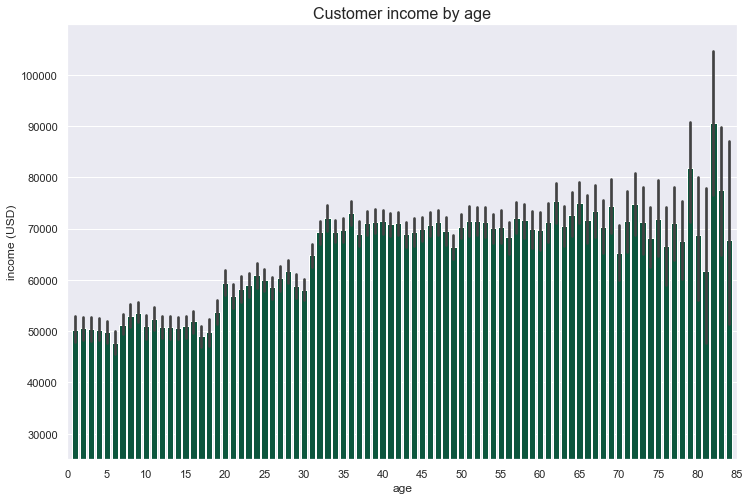

In [54]:
g = sns.barplot(x="age", y="income", data=users, color=custom_colors[0])

g.set(ylim=(25000, None))
g.set(xlim=(0, 85))

# Show less ticks:
g.xaxis.set_major_locator(ticker.MultipleLocator(5))
g.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.ylabel('income (USD)')
plt.title('Customer income by age', fontsize=16)

plt.show()

Age and income are strongly correlated variables which is expectable and intuitive.

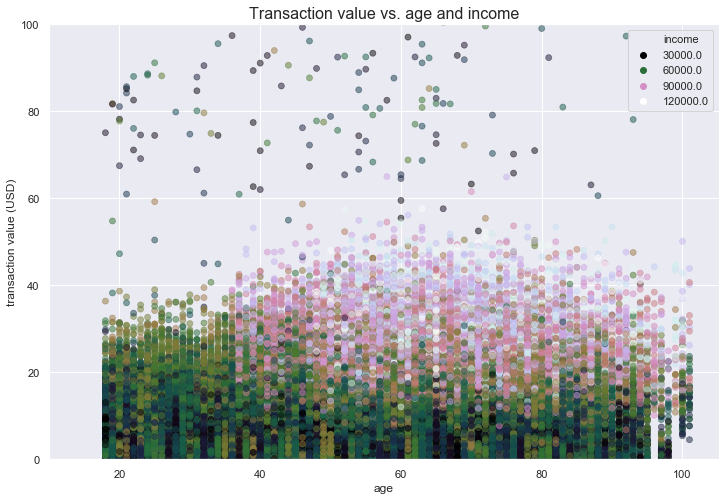

In [55]:
sns.scatterplot(x="age", y="money_spent", data=df[df.gender != "U"],
                hue="income", palette="cubehelix", edgecolor=None, alpha=0.5).set(xlim=(10, None), ylim=(0, 100))

plt.ylabel("transaction value (USD)")
plt.title('Transaction value vs. age and income', fontsize=16)

plt.show()

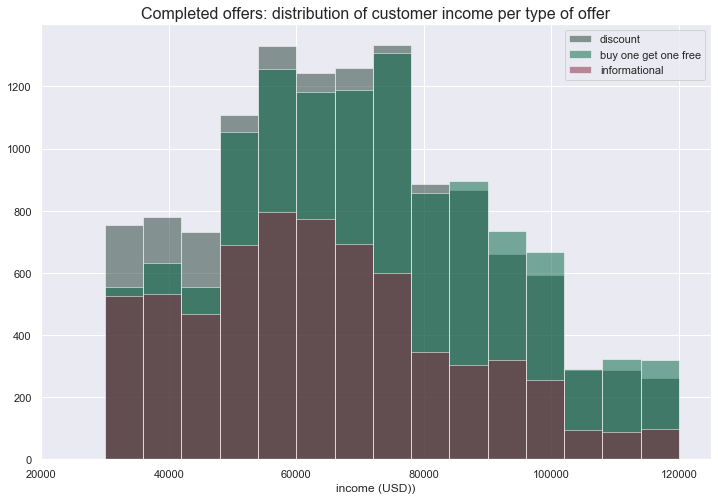

In [56]:
bogo_df = df.loc[(df.event == "offer completed") & (df.offer_type == "bogo")]
discount_df = df.loc[(df.event == "offer completed") & (df.offer_type == "discount")]
informational_df = df.loc[(df.event == "offer completed") & (df.offer_type == "informational")]

plt.figure(figsize=(12,8))

axes = plt.gca()
axes.set_xlim([20000, 125000])

plt.hist(discount_df['income'], bins=20, alpha=0.5, label='discount', color=custom_colors[2])
plt.hist(bogo_df['income'], bins=20, alpha=0.5, label='buy one get one free', color=custom_colors[0])
plt.hist(informational_df['income'], bins=20, alpha=0.5, label='informational', color=custom_colors[1])

plt.legend(loc='upper right')

plt.title('Completed offers: distribution of customer income per type of offer', fontsize=16)
plt.xlabel('income (USD))')
plt.show()

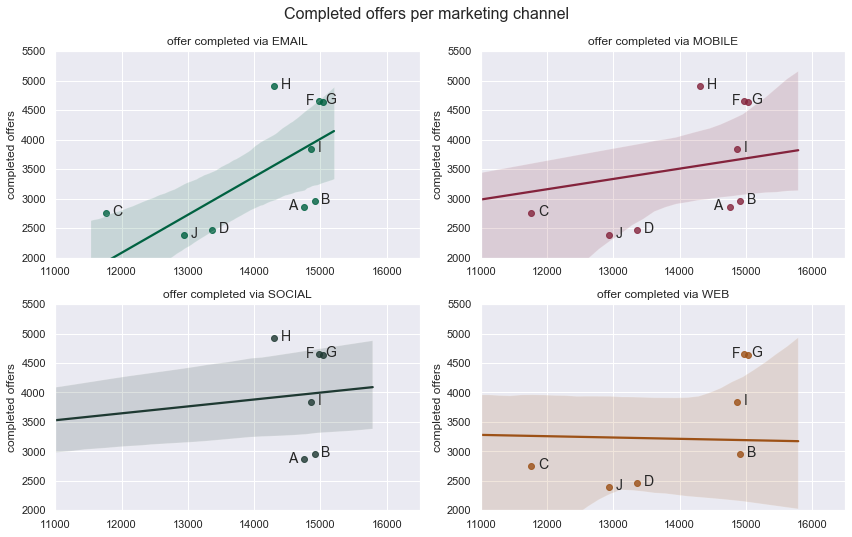

In [57]:
data = df.groupby(['short_offer_id'], as_index=False).sum()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

xlim = (11000, 16500) # x-axes limit
ylim = (2000, 5500) # y-axes limit

metric = ['channel_email', 'channel_mobile', 'channel_social', 'channel_web']
ax = [ax1, ax2, ax3, ax4]


def label_point(x, y, label, ax):
    '''Adds annotation to each data point on the plot'''
    a = pd.concat({'x': x, 'y': y, 'label': label}, axis=1)
    for i, point in a.iterrows():
        if  (xlim[0] <= point['x'] <= xlim[1]) and (ylim[0] <= point['y'] <= ylim[1]): # fixes out of canvas points
            
            if str(point['label']) == "A": # a fix to separate "A" from "B" in our plot
                ax.text(point['x']-250, point['y']-50, str(point['label']), fontsize=14)
            elif str(point['label']) == "F": # a fix to separate "F" from "G" in our plot
                ax.text(point['x']-250, point['y']-50, str(point['label']), fontsize=14)
            else:
                ax.text(point['x']+100, point['y']-50, str(point['label']), fontsize=14)
            
            
# Draw all 4 plots:
i = 0
for metric, ax in zip(metric, ax):
    # Draw a plot:
    sns.regplot(data=data, x=metric, y='event_offer_completed', ax=ax, color=custom_colors[i]).set(ylim=ylim, xlim=xlim)
    # Annotate points:
    label_point(data[metric], data['event_offer_completed'], data.short_offer_id, ax)
    i += 1

ax1.set_title("offer completed via EMAIL")
ax2.set_title("offer completed via MOBILE")
ax3.set_title("offer completed via SOCIAL")
ax4.set_title("offer completed via WEB")

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel("")
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylabel("completed offers")

fig.suptitle('Completed offers per marketing channel', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # fix suptitle overlapping
plt.show()

One complication about the provided data is that the offer "channel" information (email, mobile, social or web) was only encoded as a list in the portfolio.json, but not is the transcript.json, so even if we merge offer and transcript files together by the offer id, this "channel" information leads nowhere - we can't know which customer reacted to which channel. 

---

In [58]:
# group data by person, calculate summary spend:
data = df.groupby(['person', 'gender', 'age', 'income', 'days_of_membership'], as_index=False)['money_spent'].sum()
len(data)

17000

In [59]:
data.head(3)

,person,gender,age,income,days_of_membership,money_spent
0,0009655768c64bdeb2e877511632db8f,M,33,72000.0,545,141.16
1,00116118485d4dfda04fdbaba9a87b5c,U,-1,-1.0,176,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,O,40,57000.0,282,79.46


Using summary spend per person is not the best metric, because each person can have different days of membership in the reward app (for example one day vs. one year). We can fix this by adding new metric - average spend per membership day.

In [62]:
# Create new column "daily_spend_avg"

data['daily_spend_avg'] = data.money_spent / data.days_of_membership
data.sample(3)

,person,gender,age,income,days_of_membership,money_spent,daily_spend_avg
488,07b78a8616714b58ad3a9ed94126c459,F,73,89000.0,276,183.97,0.666558
13575,cc135dddab0b484f9010cbc57220a195,M,53,95000.0,772,83.59,0.108277
1060,104a73b6d8f049f0bdc9388ef4998526,F,46,85000.0,782,270.81,0.346304


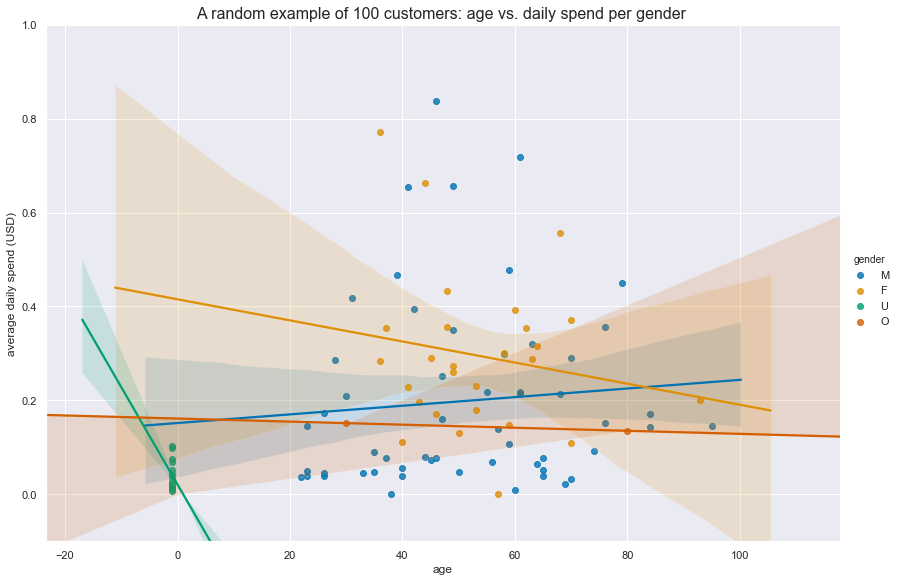

In [63]:
sample = data.sample(100)

ylim = (-0.1, 1)

sns.lmplot(x ='age', y ='daily_spend_avg', hue ='gender', data=sample, palette="colorblind", height=8, aspect=12/8).set(ylim=ylim)
plt.ylabel('average daily spend (USD)')
plt.xlabel('age')
plt.title('A random example of 100 customers: age vs. daily spend per gender ', fontsize=16)

plt.show()

This group of random 100 customers also shows that women spend more than men and "unknown" customers spend less than 0.10 USD daily on average. In this particular group female customers spend less with age increasing and the opposite is true for male, but the sample is too small to draw general conclusions about other customers.

In [64]:
print("Do we have extreme outliers?")
data.daily_spend_avg.describe()

Do we have extreme outliers?


count    17000.000000
mean         0.227455
std          0.360561
min          0.000000
25%          0.048307
50%          0.134181
75%          0.280337
max         11.286446
Name: daily_spend_avg, dtype: float64

Let's take a closer look at some outliers. Some people have spent **hundreds of dollars in one purchase**. We can hide these rows for the purpose of clearer plotting.

In [65]:
df[['offer_id', 'person', 'money_spent']].sort_values(by=['money_spent'], ascending=False).head(10)

,offer_id,person,money_spent
31585,3f207df678b143eea3cee63160fa8bed,6cf884a6c5ae4b2daccb6d3108028fef,1062.28
28503,4d5c57ea9a6940dd891ad53e9dbe8da0,454b00bdd77c4f588eb9f6cafd81dc5d,1015.73
158439,NaN,5ecaea5c8bf44ae4a65838d9d066c909,1001.85
87656,fafdcd668e3743c1bb461111dcafc2a4,dce784e26f294101999d000fad9089bb,989.34
222877,NaN,52959f19113e4241a8cb3bef486c6412,977.78
9244,ae264e3637204a6fb9bb56bc8210ddfd,626df8678e2a4953b9098246418c9cfa,966.24
202902,NaN,c7a5d7bab83a4d82a7f977b3d586f3d4,962.10
163265,NaN,6406abad8e2c4b8584e4f68003de148d,961.21
171575,NaN,ef65dd061ff24b0f805a51dd0328dbcb,957.15
235696,NaN,a73cf044395d46ea804f688490ad9227,947.43


In [66]:
# remove upper 5% outliers:
data = data[data.daily_spend_avg < data.daily_spend_avg.quantile(0.95)]
len(data)

16150

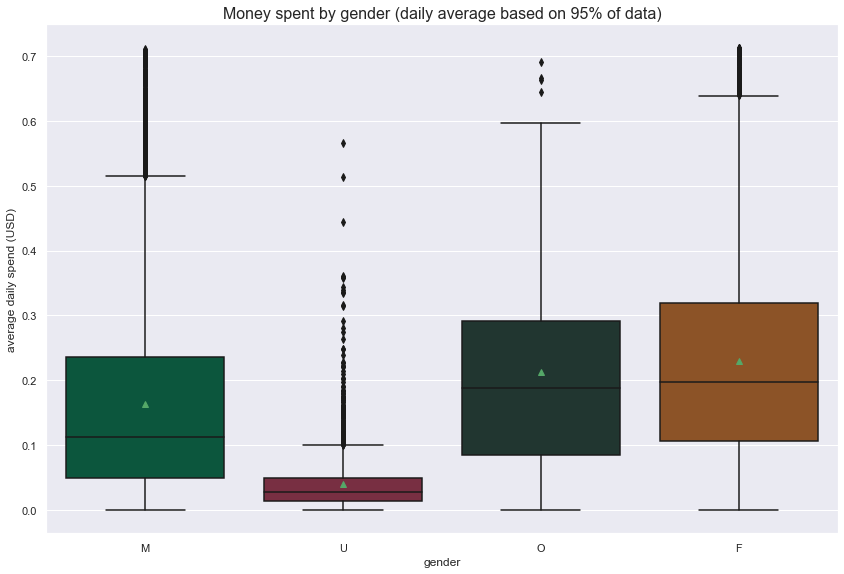

Mean values:
  gender  daily_spend_avg
0      F         0.229637
1      M         0.163935
2      O         0.213336
3      U         0.040635


In [67]:
# create plot:
sns.boxplot(x="gender", y="daily_spend_avg", data=data, showmeans=True, palette=custom_colors)

plt.tight_layout(pad=1.4)
plt.ylabel('average daily spend (USD)')
plt.xlabel('gender')
plt.title('Money spent by gender (daily average based on 95% of data)', fontsize=16)
plt.show()

print("Mean values:")
print(data.groupby(['gender'], as_index=False)['daily_spend_avg'].mean())

plt.show()

If we remove extreme outliers and look at the average daily spend distribution, we see that female customers tend to spend more with mean daily spend of 0.23 USD. The less spending customers are the "unknown" ones - customers who did not provide any demographic data to the program.

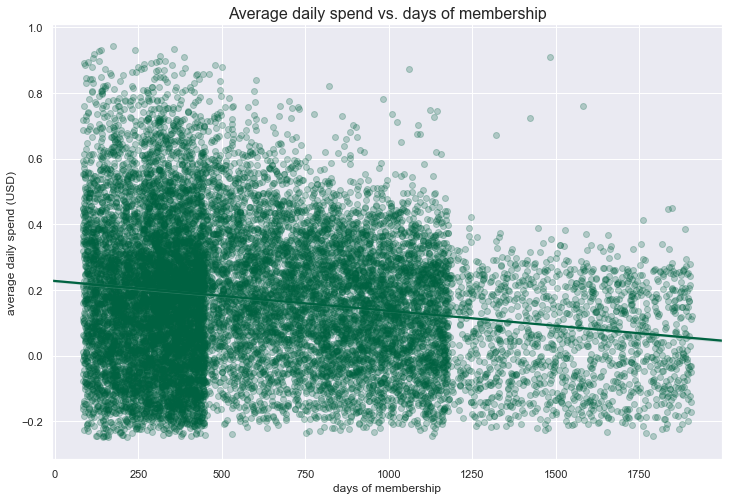

In [68]:
sns.regplot(x="days_of_membership",
            y="daily_spend_avg",
            data=data,
            x_jitter=0.25,  
            y_jitter=0.25,
            scatter_kws={'alpha': 0.25},
            color=custom_colors[0])

plt.xlabel("days of membership")
plt.ylabel("average daily spend (USD)")

plt.title('Average daily spend vs. days of membership', fontsize=16)

plt.show()

The graph above shows that average daily spend decreases for customers who are registered in the program for a longer time. Average daily spend of 3+ years customers doesn't go higher than 0.40 USD for the most of customers.

---

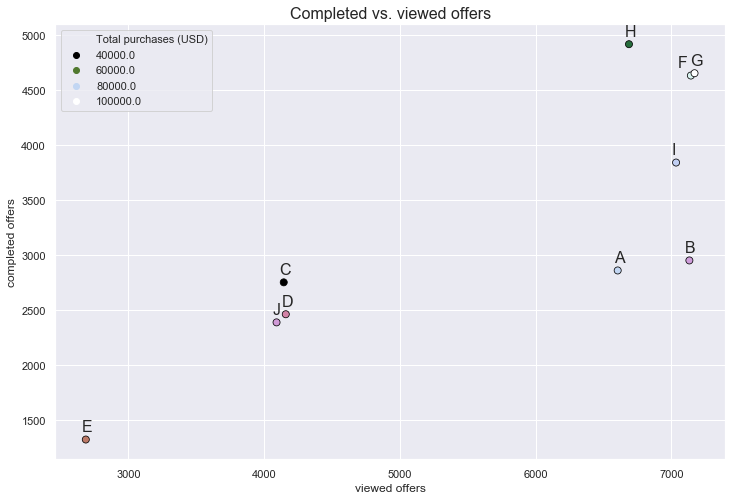

In [69]:
data = df.groupby(['short_offer_id'], as_index=False).sum()

# Draw a plot:
sns.scatterplot(x="event_offer_viewed", y="event_offer_completed", data=data, s=50, hue="money_spent",
                palette="cubehelix", edgecolor="black")

ax = plt.gca()

legend = ax.legend()
legend.texts[0].set_text("Total purchases (USD)")

# Annotate each point:
def label_point(x, y, label, ax):
    '''Adds annotation to each data point on the plot'''
    a = pd.concat({'x': x, 'y': y, 'label': label}, axis=1)
    for i, point in a.iterrows():
        if point['label'] == "F": # fix the F label in this particular plot
            ax.text(point['x']-100, point['y']+75, str(point['label']), fontsize=16)
        else:
            ax.text(point['x']-30, point['y']+75, str(point['label']), fontsize=16)

label_point(data.event_offer_viewed, data.event_offer_completed, data.short_offer_id, ax)

plt.xlabel("viewed offers")
plt.ylabel("completed offers")
plt.title('Completed vs. viewed offers', fontsize=16)

plt.show()

Here we observe the ratio of completed vs. viewed offers for each of 10 possible offers. "H", "F" and "G" offers are performing quite well based on this metric. If we look at **total purchase sum** per offer, "F" and "G" would be leaders again, but not the "H".

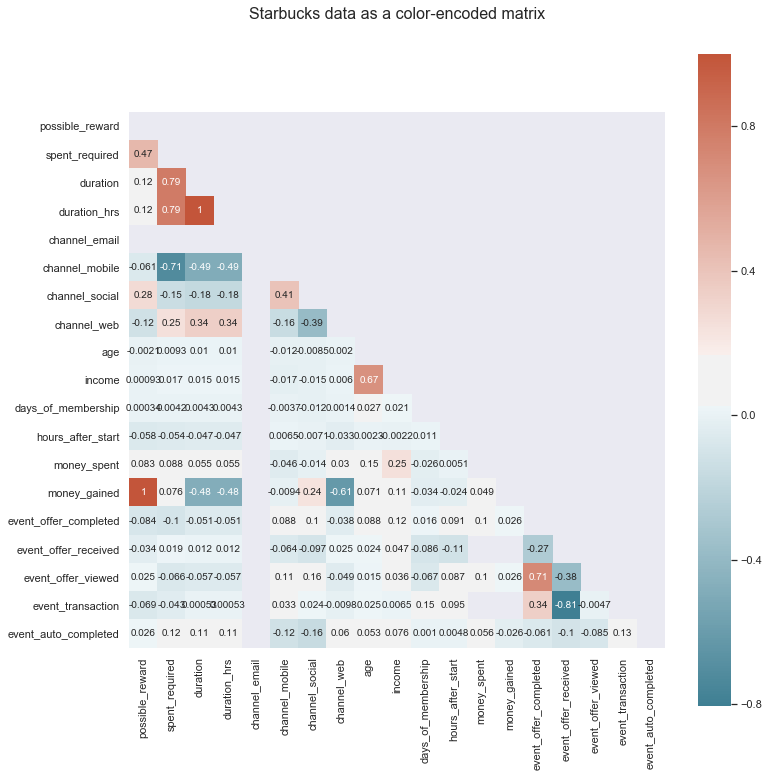

Correlation coefficient interpretation:
1 (-1) - Perfect linear relationship
0.70 (-0.70) - Strong linear relationship
0.50 (-0.50) - Moderate relationship
0.30 (-0.30) - Weak linear relationship
0 - No linear relationship


In [70]:
f, ax = plt.subplots(figsize = (12,12))

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,
            cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True),
            square=True, ax=ax,
            annot=True, annot_kws={"size": 10})

ax.set_ylim(sorted(ax.get_xlim(), reverse=True)) # fix for the cropped graph

plt.title('Starbucks data as a color-encoded matrix\n\n\n\n\n', fontsize=16)

plt.show()

print("Correlation coefficient interpretation:"
+ "\n1 (-1) - Perfect linear relationship"
+ "\n0.70 (-0.70) - Strong linear relationship"
+ "\n0.50 (-0.50) - Moderate relationship"
+ "\n0.30 (-0.30) - Weak linear relationship"
+ "\n0 - No linear relationship")

___
Please refer to [PROJECT REPORT](https://evanca.github.io/machine-learning_optimizing-app-offers-with-starbucks/) for a conclusions and a high-level overview of the full project.